In [1]:
import cv2
import os

# A class for image bluring
class ImageBlur:
    def __init__(self, input_file):
        self.input_file = input_file
        if not os.path.exists(self.input_file):
            raise ValueError(f"Input file '{self.input_file}' does not exist.")
        self.image = cv2.imread(self.input_file)
        if self.image is None:
            raise ValueError(f"Failed to load input file '{self.input_file}'.")
        
    def apply_gaussian_blur(self, kernel_size=(5, 5), sigma_x=0):
        if self.image is not None:
            self.image = cv2.GaussianBlur(self.image, kernel_size, sigma_x)
        
    def apply_box_blur(self, kernel_size=(5, 5)):
        if self.image is not None:
            self.image = cv2.blur(self.image, kernel_size)
        
    def save_blurred_image(self, output_file):
        if self.image is not None:
            cv2.imwrite(output_file, self.image)
    
    def show_blurred_image(self):
        if self.image is not None:
            cv2.imshow('Blurred Image', self.image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()


In [3]:
path_to_file = ".\images\Samoyed-dog.webp"

blur = ImageBlur(path_to_file)
blur.apply_gaussian_blur(kernel_size=(15, 15), sigma_x=0)
blur.save_blurred_image('blured_image.jpg')
blur.show_blurred_image()

In [2]:
# A class for image enchanting
class ImageEnhancement:
    def __init__(self, input_file):
        self.input_file = input_file
        if not os.path.exists(self.input_file):
            raise ValueError(f"Input file '{self.input_file}' does not exist.")
        self.image = cv2.imread(self.input_file)
        if self.image is None:
            raise ValueError(f"Failed to load input file '{self.input_file}'.")
        
    def apply_gamma_correction(self, gamma=1.0):
        if self.image is not None:
            self.image = cv2.pow(self.image / 255.0, gamma)
            self.image = cv2.normalize(self.image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    
    def apply_various_linear_filter(self):
        pass

    def apply_various_nonlinear_filter(self):
        pass

    def apply_fourier_frequency_domain_methods(self):
        pass

    def apply_wavelet_frequency_domain_methods(self):
        pass
        
    def show_image(self, window_name='Image'):
        if self.image is not None:
            cv2.imshow(window_name, self.image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
            
    def save_image(self, output_file):
        if self.image is not None:
            cv2.imwrite(output_file, self.image)

In [5]:
blured_image_path = "./blured_image.jpg"

enhance = ImageEnhancement(blured_image_path)
enhance.apply_gamma_correction(gamma=2)
enhance.show_image()
enhance.save_image('enhanced_image.jpg')

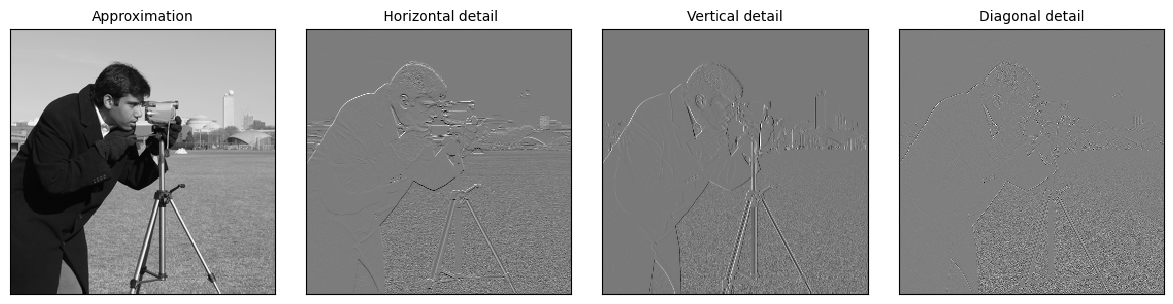

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()